In [1]:
import pytesseract
from PIL import Image
import cv2
import numpy as np
import imutils
import matplotlib.pyplot as plt
import PIL.ImageOps

# only use gray 

In [2]:
imgPath = 'test/121.png'
img = cv2.imread(imgPath)
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

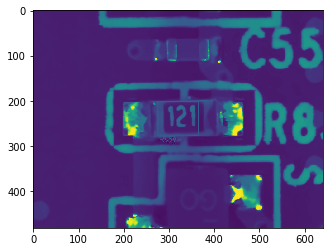

In [3]:
plt.imshow(gray)

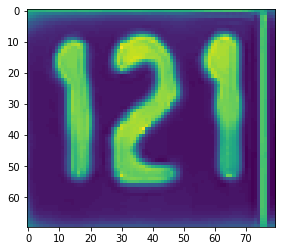

In [8]:
crap_img = gray[202:272,290:370]
plt.imshow(crap_img)

In [9]:
# Tesseract OCR on the image
temp = pytesseract.image_to_string(crap_img, config="--psm 13")
print(temp)

121



# Add gaussianblur, dilate

In [10]:
imgPath = 'test/test2.png'
img = cv2.imread(imgPath)
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

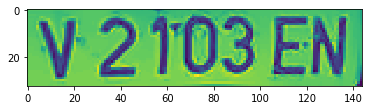

In [11]:
plt.imshow(gray)

In [33]:
im_blur = cv2.GaussianBlur(gray,(5, 5), 0)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
im_dilate = cv2.dilate(im_blur,kernel)
_, im_th = cv2.threshold(im_dilate, 150, 255, cv2.THRESH_BINARY )

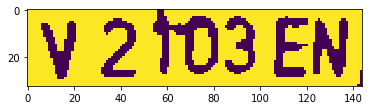

In [34]:
plt.imshow(im_th)

In [35]:
# Tesseract OCR on the image
temp = pytesseract.image_to_string(im_th, config="--psm 13")
print(temp)

V2103EN



# another difficult picture

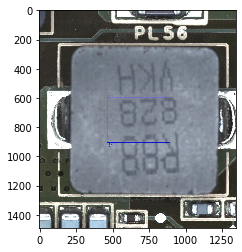

In [37]:
imgPath = 'test/R88.png'
img = cv2.imread(imgPath)
plt.imshow(img)

(1) use 3 times blur and use 3 times dilate+erode+absdiff
(2) use cv2.threshold( image, 254, 255, cv2.THRESH_BINARY )
(3) enchance img (cv2.threshold(im, 130, 255,cv2.THRESH_BINARY)) and then cut the (3) image
(4) use canny